#Bibliothéque

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Dense, Flatten, Reshape, Input, LSTM,Dropout, BatchNormalization, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#load data

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# List files in the dataset directory
folder_path = '/content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data'
print(os.listdir(folder_path))

['F', 'N', 'O', 'Z', 'S']


In [ ]:
# Check if there are subfolders for each class (e.g., Z, O, N, F, S)
for subfolder in ['N', 'O', 'S', 'Z']:
    subfolder_path = os.path.join(folder_path, subfolder)
    if os.path.exists(subfolder_path):
        print(f"Contents of {subfolder_path}:", os.listdir(subfolder_path))
    else:
        print(f"Subfolder {subfolder} does not exist.")

Contents of /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N: ['N038.txt', 'N011.txt', 'N005.txt', 'N039.txt', 'N014.txt', 'N006.txt', 'N007.txt', 'N003.txt', 'N012.txt', 'N004.txt', 'N002.txt', 'N016.txt', 'N010.txt', 'N028.txt', 'N017.txt', 'N015.txt', 'N013.txt', 'N071.txt', 'N029.txt', 'N059.txt', 'N001.txt', 'N099.txt', 'N072.txt', 'N065.txt', 'N058.txt', 'N073.txt', 'N067.txt', 'N098.txt', 'N066.txt', 'N064.txt', 'N070.txt', 'N049.txt', 'N060.txt', 'N047.txt', 'N076.txt', 'N075.txt', 'N048.txt', 'N088.txt', 'N089.txt', 'N061.txt', 'N062.txt', 'N100.txt', 'N077.txt', 'N074.txt', 'N063.txt', 'N053.txt', 'N044.txt', 'N086.txt', 'N092.txt', 'N093.txt', 'N087.txt', 'N091.txt', 'N079.txt', 'N090.txt', 'N052.txt', 'N085.txt', 'N046.txt', 'N084.txt', 'N050.txt', 'N078.txt', 'N069.txt', 'N045.txt', 'N083.txt', 'N068.txt', 'N042.txt', 'N041.txt', 'N054.txt', 'N056.txt', 'N082.txt', 'N040.txt', 'N097.txt', 'N096.txt', 'N051.txt', 'N055.txt', 'N019.txt', 'N033.txt', 'N095.txt', 'N0

In [ ]:
def load_class_data(folder_path, class_prefix):
    data = []
    subfolder_path = os.path.join(folder_path, class_prefix)  # Add subfolder
    for i in range(1, 101):
        file_name = f"{class_prefix}{i:03}.txt"  # e.g., Z001.txt, Z002.txt, etc.
        file_path = os.path.join(subfolder_path, file_name)  # File path with subfolder
        print(f"Attempting to load file: {file_path}")  # Debugging line

        if os.path.isfile(file_path):
            try:
                signal = np.loadtxt(file_path)
                data.append(signal)
            except ValueError as e:
                print(f"Error loading {file_path}: {e}")
        else:
            print(f"File not found: {file_path}")
    return np.array(data)

In [ ]:
# Load data for each class (update folder paths as per your Kaggle structure)
folder_path = '/content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data'
class_data_N = load_class_data(folder_path, 'N')
class_data_O = load_class_data(folder_path, 'O')
class_data_Z = load_class_data(folder_path, 'Z')
class_data_S = load_class_data(folder_path, 'S')

Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N001.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N002.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N003.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N004.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N005.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N006.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N007.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N008.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N009.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/epilepsy_data/N/N010.txt
Attempting to load file: /content/gdrive/MyDrive/Bonn uni data/data/ep

In [ ]:
# Check the shapes of the loaded arrays
print("Shape of class_data_F:", class_data_N.shape)
print("Shape of class_data_N:", class_data_O.shape)
print("Shape of class_data_N:", class_data_Z.shape)
print("Shape of class_data_S:", class_data_S.shape)

Shape of class_data_F: (100, 4097)
Shape of class_data_N: (100, 4097)
Shape of class_data_N: (100, 4097)
Shape of class_data_S: (100, 4097)


In [ ]:
X_epilepsy_data = np.vstack([class_data for class_data in [class_data_N,class_data_O,class_data_Z, class_data_S] if class_data.size > 0])

In [ ]:
print("Shape of concatenated X:", X_epilepsy_data.shape)

Shape of concatenated X: (400, 4097)


In [ ]:
# Define labels for the dataset
y = np.array([0] * len(class_data_N) +
             [0] * len(class_data_O) +
             [0] * len(class_data_Z) +
             [1] * len(class_data_S)
             )

In [ ]:
y.shape

(400,)

#Data normalisation

In [ ]:
scaler = StandardScaler()
X_epilepsy_data_normalized = scaler.fit_transform(X_epilepsy_data)

In [ ]:
X_epilepsy_data_normalized.shape

(400, 4097)

In [ ]:
# Replace `X_epilepsy_data_normalized` with your actual EEG data
X = X_epilepsy_data_normalized  # Shape: (400, 4097)

In [ ]:
X_epilepsy_data_normalized.shape

(400, 4097)

#preprocessing for CWT and CAE

In [ ]:
def segment_signal(signal, window_size=1458, overlap=486):
    step = window_size - overlap
    segments = []
    for start in range(0, len(signal) - window_size + 1, step):
        segments.append(signal[start:start + window_size])
    return np.array(segments)

In [ ]:
window_size = 1458
overlap = 486

In [ ]:
# Apply windowing to all signals
X_windowed = []
y_windowed = []
for signal, label in zip(X, y):
    signal_windows = segment_signal(signal, window_size, overlap)
    X_windowed.extend(signal_windows)
    y_windowed.extend([label] * len(signal_windows))  # Repeat the label for each window

X_windowed = np.array(X_windowed)
y_windowed = np.array(y_windowed)

In [ ]:
print('X_window shape is :', X_windowed.shape)
print('y_window shape is :',y_windowed.shape)

X_window shape is : (1200, 1458)
y_window shape is : (1200,)


#compute cwt for each signal window

In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 52.1 MB/s eta 0:00:00


In [ ]:
import pywt
from skimage.transform import resize

In [ ]:
def compute_cwt(window, scales=np.arange(1, 128), wavelet='cmor1.5-1.0'):
    coeffs, _ = pywt.cwt(window, scales, wavelet)
    coeffs = np.abs(coeffs)  # Magnitude of coefficients
    resized_coeffs = resize(coeffs, (256, 256), mode='constant')  # Resize to (256, 256)
    return resized_coeffs

In [ ]:
# Apply CWT to all windows
cwt_images = np.array([compute_cwt(window) for window in X_windowed])

In [ ]:
print( 'the shape of cwt_images is :',cwt_images.shape)

the shape of cwt_images is : (1200, 256, 256)


In [ ]:
cwt_images = cwt_images[..., np.newaxis]  # Add channel dimension

In [ ]:
print( 'the shape of cwt_images is :',cwt_images.shape)

the shape of cwt_images is : (1200, 256, 256, 1)


#CAE

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Conv2DTranspose, Dense, Flatten, Reshape

In [ ]:
def build_cae(input_shape=(256, 256, 1)):
    input_layer = Input(shape=input_shape)

    # Encoder
    x = Conv2D(16, (3, 3), strides=(2, 2), activation='relu', padding='same')(input_layer)
    x = Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2D(255, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)

    latent_space = Flatten(name='flatten_layer')(x)
    latent_space = Dense(128, activation='relu',name='latent_dense')(latent_space)

    # Decoder
    x = Dense(8 * 8 * 255, activation='relu',name='dec_dense')(latent_space)
    x = Reshape((8, 8, 255), name='dec_reshape')(x)
    x = Conv2DTranspose(128, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    x = Conv2DTranspose(16, (3, 3), strides=(2, 2), activation='relu', padding='same')(x)
    output_layer = Conv2DTranspose(1, (3, 3),strides=(2, 2), activation='sigmoid', padding='same',name='dec_conv5')(x)

    cae = Model(input_layer, output_layer,name='CAE')
    encoder = Model(input_layer, latent_space,name='encoder')
    return cae, encoder

In [ ]:
cae, encoder = build_cae()

In [ ]:
cae.compile(optimizer='adam', loss='mse')

In [ ]:
cae.summary()

Model: "CAE"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 128, 128, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 255)           │         294,015 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_layer (Flatten)              │ (None, 16320)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_dense (Dense)                 │ (None, 128)                 │       2,089,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_dense (Dense)                    │ (None, 16320)               │       2,105,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_reshape (Reshape)                │ (None, 8, 8, 255)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 16, 16, 128)         │         293,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 64, 64, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_3 (Conv2DTranspose) │ (None, 128, 128, 16)        │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dec_conv5 (Conv2DTranspose)          │ (None, 256, 256, 1)         │             145 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,976,448 (18.98 MB)

 Trainable params: 4,976,448 (18.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Normalize the input data
cwt_images = cwt_images / np.max(cwt_images)

In [ ]:
history_cae=cae.fit(cwt_images, cwt_images, epochs=50, batch_size=32, validation_split=0.3)

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 17s 280ms/step - loss: 0.2273 - val_loss: 0.1625
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.1461 - val_loss: 0.0182
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.5494e-04 - val_loss: 0.0182
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 7.5014e-04 - val_loss: 0.0182
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.2501e-04 - val_loss: 0.0182
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.1263e-04 - val_loss: 0.0182
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.2685e-04 - val_loss: 0.0182
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 7.2729e-04 - val_loss: 0.0182
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.3684e-04 - val_loss: 0.0182
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 7.1189e-04 - val_loss: 0.0182
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 7.1140e-04 - val_loss: 0.0182
Epoch 12/50
27/27 ━━━━━━━

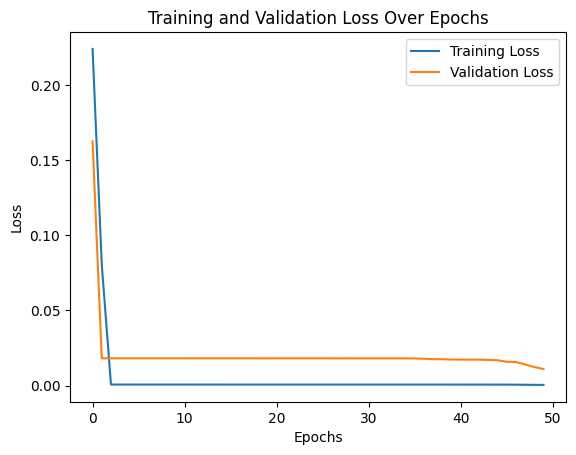

In [ ]:
plt.plot(history_cae.history['loss'], label='Training Loss')
plt.plot(history_cae.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

#PCA

In [ ]:
latent_features = encoder.predict(cwt_images)

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


In [ ]:
# 4. Apply PCA to latent features
pca = PCA(n_components=128)
latent_features_pca = pca.fit_transform(latent_features)

In [ ]:
latent_features_pca.shape

(1200, 128)

In [ ]:
print("Explained variance by 128 components:", sum(pca.explained_variance_ratio_))

Explained variance by 128 components: 1.0000000000797418


#stat features extraction

In [ ]:
from scipy.stats import kurtosis, skew

In [ ]:
def compute_stat_features(X):
    mean = np.mean(X, axis=1)
    var = np.var(X, axis=1)
    std = np.std(X, axis=1)
    min_val = np.min(X, axis=1)
    max_val = np.max(X, axis=1)
    range_val = max_val - min_val
    rms = np.sqrt(np.mean(np.square(X), axis=1))
    energy = np.sum(np.square(X), axis=1)
    skewness = np.mean(((X - mean[:, np.newaxis]) / std[:, np.newaxis])**3, axis=1)
    kurtosis = np.mean(((X - mean[:, np.newaxis]) / std[:, np.newaxis])**4, axis=1)
    power = np.mean(np.square(X), axis=1)
    crest_factor = max_val / rms
    shape_factor = rms / mean
    impulse_factor = max_val / mean
    return np.hstack((mean[:, np.newaxis], var[:, np.newaxis], std[:, np.newaxis], min_val[:, np.newaxis],
                     max_val[:, np.newaxis],range_val[:, np.newaxis], rms[:, np.newaxis], energy[:, np.newaxis],
                     skewness[:, np.newaxis], kurtosis[:, np.newaxis], power[:, np.newaxis], crest_factor[:, np.newaxis],
                     shape_factor[:, np.newaxis], impulse_factor[:, np.newaxis]))

In [ ]:
stat_features = compute_stat_features(X_windowed)

In [ ]:
window_ids = np.arange(len(latent_features_pca))

In [ ]:
FAE_with_ids = np.hstack((window_ids[:, np.newaxis], latent_features_pca))
Fstat_with_ids = np.hstack((window_ids[:, np.newaxis], stat_features))

In [ ]:
# Validate IDs before combining
if not np.array_equal(FAE_with_ids[:, 0], Fstat_with_ids[:, 0]):
    raise ValueError("Window IDs do not match between FAE and Fstat!")

In [ ]:
# 6. Combine PCA features with statistical features
hybrid_features = np.hstack((FAE_with_ids, Fstat_with_ids[:, 1:]))

In [ ]:
hybrid_features.shape

(1200, 143)

#LSTM classifier

In [ ]:
y_categorical = to_categorical(y_windowed, num_classes=2)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(hybrid_features, y_categorical, test_size=0.2, random_state=42)

In [ ]:
# Build LSTM classifier
lstm_model = Sequential([
    LSTM(128, input_shape=(hybrid_features.shape[1], 1)),
    Dense(2, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print('Xtrain shape is',X_train.shape)
print('Xtest shape is',X_test.shape)
print('ytrain shape is',y_train.shape)
print('ytest shape is',y_test.shape)

Xtrain shape is (960, 143)
Xtest shape is (240, 143)
ytrain shape is (960, 2)
ytest shape is (240, 2)


In [ ]:
X_train_lstm = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_lstm = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
print('xtrain lstm shape is',X_train_lstm.shape)
print('xtest lstm shape is',X_test_lstm.shape)

xtrain lstm shape is (960, 1, 143)
xtest lstm shape is (240, 1, 143)


In [ ]:
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_lstm=lstm_model.fit(X_train_lstm, y_train, validation_data=(X_test_lstm, y_test), epochs=50, batch_size=32)

Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.6275 - loss: 0.6223 - val_accuracy: 0.7625 - val_loss: 0.3575
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8804 - loss: 0.3039 - val_accuracy: 0.9292 - val_loss: 0.2115
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9200 - loss: 0.2243 - val_accuracy: 0.9250 - val_loss: 0.2074
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9313 - loss: 0.1732 - val_accuracy: 0.9625 - val_loss: 0.1479
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9557 - loss: 0.1342 - val_accuracy: 0.9625 - val_loss: 0.1180
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9747 - loss: 0.1043 - val_accuracy: 0.9875 - val_loss: 0.1010
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9854 - loss: 0.0925 - val_accuracy: 0.9875 - val_loss: 0.0790
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9807 - loss: 0.0883 - val_accuracy: 0.9875 - val_loss

In [ ]:
# Step 7: Evaluate the Model
val_accuracy = history_lstm.history['val_accuracy'][-1]
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.987500011920929


In [ ]:
test_loss, test_accuracy = lstm_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9953 - loss: 0.0191 
Test Loss: 0.0267
Test Accuracy: 0.9917


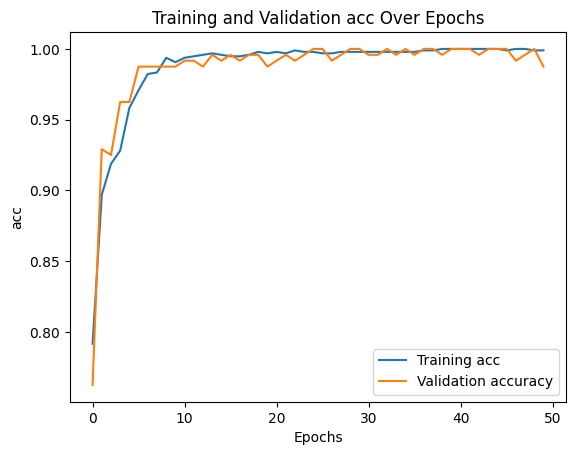

In [ ]:
plt.plot(history_lstm.history['accuracy'], label='Training acc')
plt.plot(history_lstm.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.title('Training and Validation acc Over Epochs')
plt.legend()
plt.show()

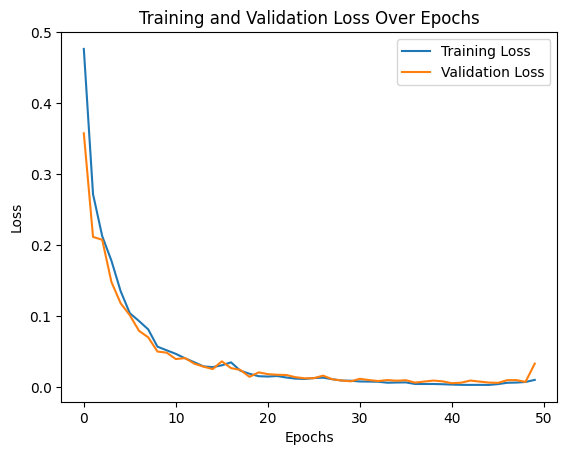

In [ ]:
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
y_pred_probs = lstm_model.predict(X_test_lstm)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)  # Predicted labels
y_true = np.argmax(y_test, axis=1)        # True labels

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [ ]:
cm = confusion_matrix(y_true,y_pred)

<Axes: >

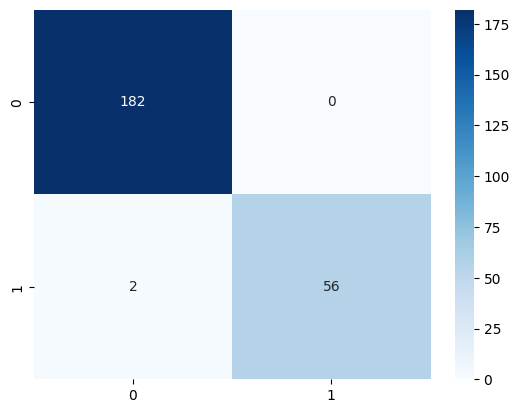

In [ ]:
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues")

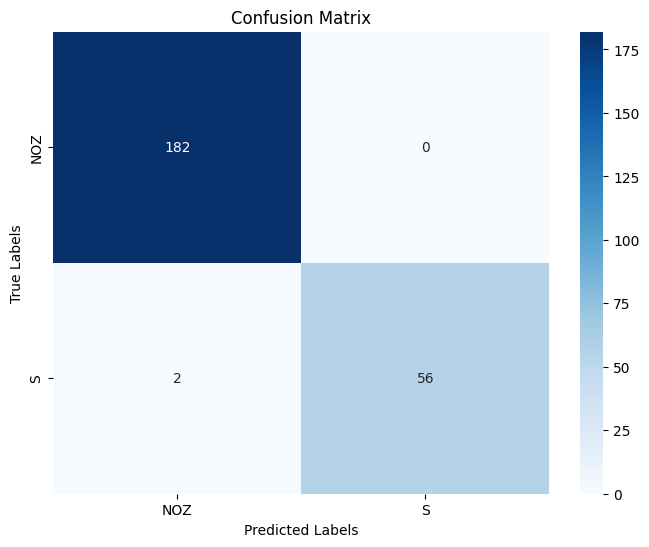

In [ ]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['NOZ', 'S'], yticklabels=['NOZ', 'S'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Text(0, 0.5, 'Fraction of incorrect predictions')

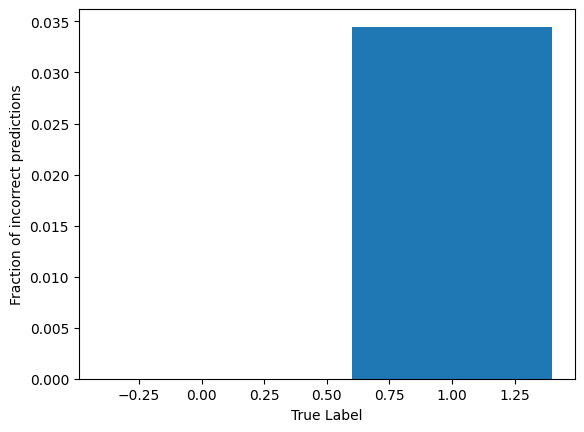

In [ ]:
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(2), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

In [ ]:
from sklearn.metrics import classification_report,roc_auc_score,recall_score,accuracy_score,f1_score

In [ ]:
print(classification_report(y_true, y_pred, target_names=['NOZ', 'S']))

              precision    recall  f1-score   support

         NOZ       0.99      1.00      0.99       182
           S       1.00      0.97      0.98        58

    accuracy                           0.99       240
   macro avg       0.99      0.98      0.99       240
weighted avg       0.99      0.99      0.99       240

